<a href="https://colab.research.google.com/github/nehadubey1205/NLP-college/blob/main/BERT16FEBpart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('/content/cleaned_hinglish_dataset.csv')

In [3]:
data.tail(2)

,text,Bully_Label,Sentiment_label,Emotion_label
6003,crazi mother pussi,1,negative,disgust
6004,love claim betray sharma sharmabrand trend sha...,0,neutral,sadness


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6005 entries, 0 to 6004
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   text             5988 non-null   object
 1   Bully_Label      6005 non-null   int64 
 2   Sentiment_label  6005 non-null   object
 3   Emotion_label    6005 non-null   object
dtypes: int64(1), object(3)
memory usage: 187.8+ KB


In [4]:
%%capture
!pip install swifter

In [5]:
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

def get_ngrams(text, n=2):
    text = str(text)
    n_grams = ngrams(text.split(), n)
    returnVal = []
    
    try:
        for grams in n_grams:
            returnVal.append('_'.join(grams))
    except(RuntimeError):
        pass
        
    return ' '.join(returnVal).strip()

In [6]:
import swifter

In [7]:
data["bigram_text"] = data["text"].swifter.apply(get_ngrams, n=2)

Pandas Apply:   0%|          | 0/6005 [00:00<?, ?it/s]

In [8]:
tweet_string_list = data['bigram_text'].tolist()
tweet_string = ' '.join(tweet_string_list)

In [ ]:
from wordcloud import WordCloud   # for the wordcloud
wordcloud = WordCloud(width = 2000, height = 1334, random_state=1, background_color='black', colormap='Pastel1', max_words = 75, collocations=False, normalize_plurals=False).generate(tweet_string)

In [ ]:
import matplotlib.pyplot as plt


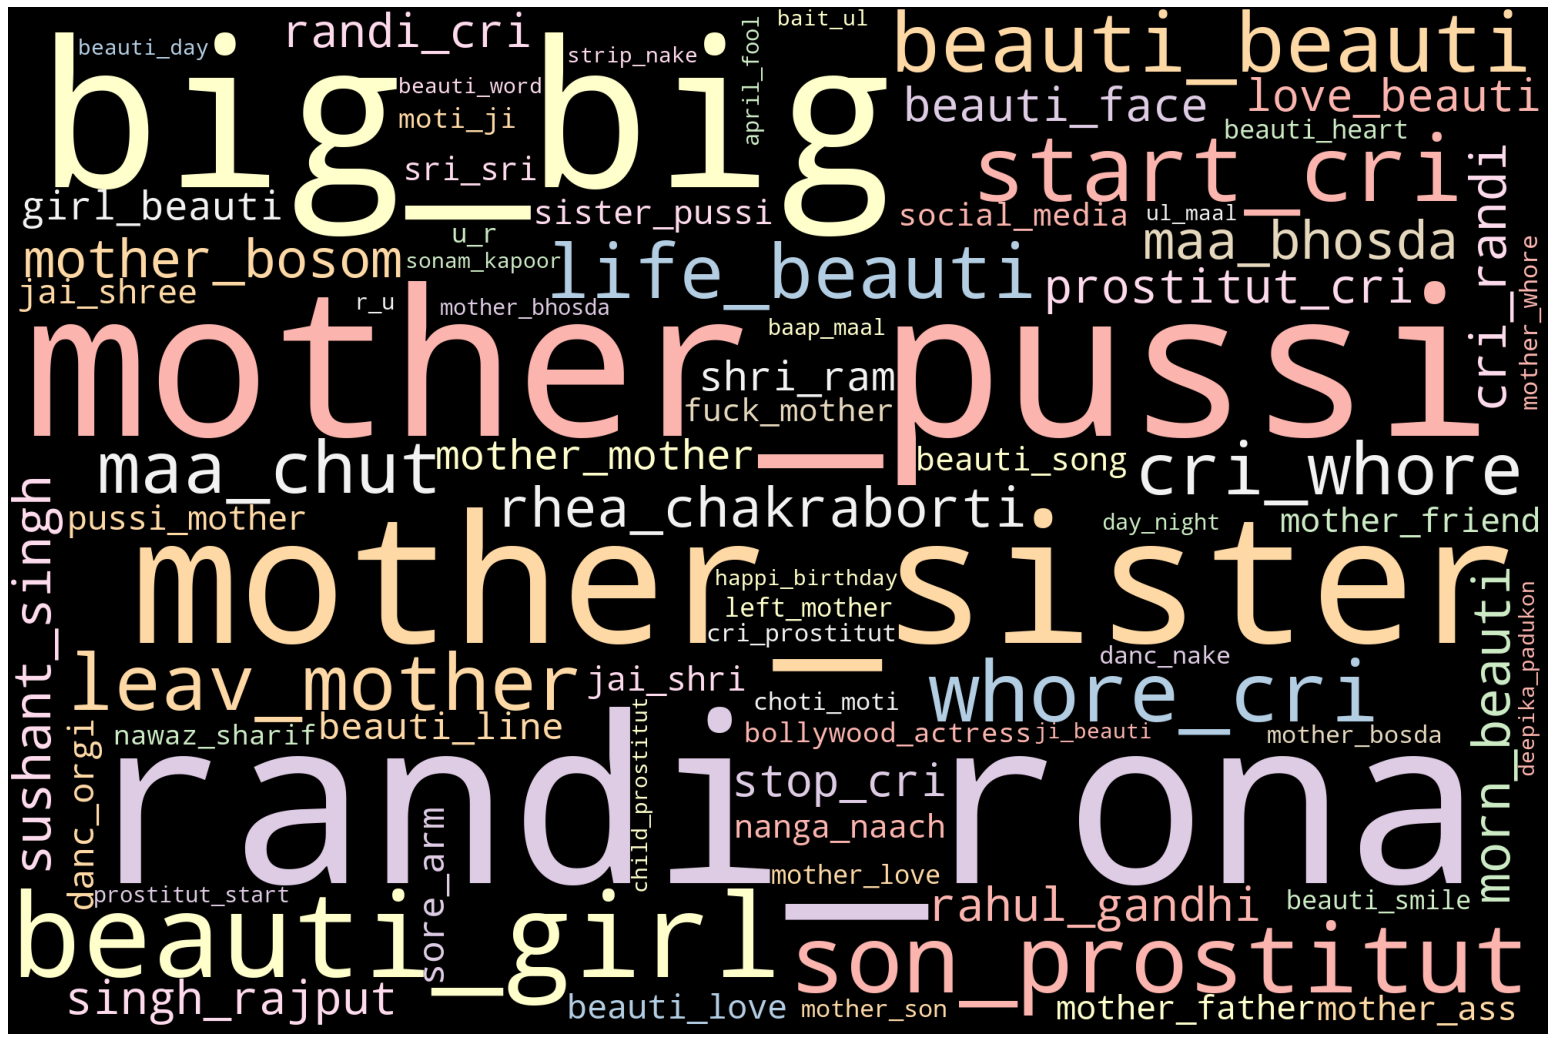

In [ ]:
from matplotlib.pyplot import figure

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    fig = plt.figure(figsize=(25, 17), dpi=80)
    plt.tight_layout(pad=0)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.box(False)
    plt.show()
    plt.close() 
   
#Plot
plot_cloud(wordcloud)    

In [ ]:
data.tail(2)

,text,Bully_Label,Sentiment_label,Emotion_label,bigram_text
6003,crazi mother pussi,1,negative,disgust,crazi_mother mother_pussi
6004,love claim betray sharma sharmabrand trend sha...,0,neutral,sadness,love_claim claim_betray betray_sharma sharma_s...


NEW code is adding here

In [9]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [10]:
!pip install transformers

from transformers import BertTokenizer, TFBertForSequenceClassification

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 71.8 MB/s eta 0:00:00


In [11]:
# Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

# Tokenize the Hinglish text data
tokenized = data['bigram_text'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))


In [12]:
# Pad the tokenized data to a maximum sequence length of 128
max_len = 128
padded = tf.keras.preprocessing.sequence.pad_sequences(tokenized, maxlen=max_len, padding='post')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded, data['Bully_Label'], test_size=0.2)

In [13]:
# Load the pre-trained BERT model for sequence classification
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=2)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [14]:
# Compile the BERT model
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
bert_model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [15]:
# Train the BERT model on the training set
epochs = 2
batch_size = 32
history = bert_model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size)


Epoch 1/2
121/121 [==============================] - 6929s 57s/step - loss: 0.6973 - accuracy: 0.4926 - val_loss: 0.6937 - val_accuracy: 0.5068
Epoch 2/2
121/121 [==============================] - 6582s 54s/step - loss: 0.6974 - accuracy: 0.4918 - val_loss: 0.6948 - val_accuracy: 0.4932


In [ ]:
# Evaluate the BERT model on the testing set
y_pred = bert_model.predict(X_test)[0].argmax(axis=-1)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

 5/38 [==>...........................] - ETA: 8:14

RUN TILL HERE

In [ ]:
!pip install transformers

from transformers import BertTokenizer, TFBertModel
import tensorflow as tf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

# Tokenize the Hinglish text and convert it to a format that BERT can process
def tokenize_text(text):
    encoded = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=128,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='tf'
    )
    return {
        'input_ids': encoded['input_ids'][0],
        'attention_mask': encoded['attention_mask'][0],
        'token_type_ids': encoded['token_type_ids'][0]
    }

In [ ]:
# Tokenize the Hinglish text data
tokenized = data['bigram_text'].apply((lambda x: tokenize_text(x)))


NameError: ignored

In [ ]:

# Load the pre-trained BERT model
bert_model = TFBertModel.from_pretrained('bert-base-multilingual-cased')

Some layers from the model checkpoint at bert-base-multilingual-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
import tensorflow as tf


In [ ]:
from nltk.tokenize import tokenized

ImportError: ignored

In [ ]:
# Run the tokenized data through the BERT model to obtain embeddings
input_ids = tf.stack(tokenized.apply(lambda x: x['input_ids']))

NameError: ignored

In [ ]:

attention_mask = tf.stack(tokenized.apply(lambda x: x['attention_mask']))
token_type_ids = tf.stack(tokenized.apply(lambda x: x['token_type_ids']))
embeddings = bert_model(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)[0]



In [ ]:
# Save the embeddings as a CSV file
df_out = pd.concat([data, pd.DataFrame(embeddings.numpy())], axis=1)
df_out.to_csv('hinglish_embeddings.csv', index=False)
